
# Project: Investigate the TMDb_ Movie Dataset

By: Naseer Faheem,
    August 2018

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



>I have selected the movie database from TMDB to investigate as a clas project for Udacity's Data Analyst Nanodgree (DAND). My independent variable is profitibility and my depenent variables are budget, genres, release month and popularity. My goal is find answers to the following questions: 
>_____________________________________________________________________________________________________________________________
<ul>
    <li> <a href="#q1">1. Are movies with higher budget more profitable?</a></li>
    <li> <a href="#q2">2. What movie genres are the most profitable?</a></li>
    <li> <a href="#q3">3. Does the release month affect the movie's profitablity?</a></li> 
    <li> <a href="#q4">4. Is there a coreclation  between the popular movies and their profitability?</a></li> 
    >
</ul>

>_____________________________________________________________________________________________________________________________
    >I also would like to explore the following questions: 
    >
<ul>
    <li> <a href="#s1">1. How does the total profit of the movies has changed over the years?</a></li>
    <li> <a href="#s2">2. What genres are more popular?</a></li>  
</ul>

>_____________________________________________________________________________________________________________________________


In [1]:
#Importing the necessary packages that will be used in this project. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load the data set, check for cleanliness. I will make sure that the data is ready for analysis which will follow after this section. 

### General Properties

In [2]:
#load the data and getting a general sense of the data. 
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
#Printing the the first 5 rows of the file. 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<ul>
    <li><a href="#intro"> Back to Introduction </a></li>
</ul>

### Data Cleaning:
After a quick look over the data, I want to do the following tasks to clean the data set. 
<ul>
    <li> <a href="#dropping">1. drop </a>the unnecessary columns.</li>
    <li><a href="#dropnulls">2. drop the null </a>values in the the columns needed for the analysis.</li>
    <li><a href="#removedups">3. remove duplicates</a> if any are present in the dataset.</li> 
    <li><a href="#convertdate">4. convert the release_date </a>to date format and create the release_month column.</li>
    <li><a href="#creatprofit">5. create the profitablity </a> columns by subracting the budget from the revenue column</li>
</ul>


##### Limitations: 
> - The budget_adj, and revenue_adj columns have rows with 0 values in them. In order to find accurate answers for my research questions, I choose to drop those rows. 
> - The values in the budget_adj and revenue_adj columns do not have a specific currency. For the sake of this analysis, I would assume that the currency is US dollars. 
> - In order to consider the inflation, I would be using the Adjusted Budget and Adjusted Revenue Columns



<a id='droping'></a>
#### 1. Drop unncessary columns:
I will drop the following columns since they do not affect the result of the my research questions: 
- id
- imdb_id
- cast
- homepage
- tagline
- keywords
- overview





<ul>
    <li><a href="#intro"> Back to Introduction </a></li>
</ul>

In [4]:
#Here I am dropping the columns that I will not use in my dataset 
columns_to_drop = ['id','imdb_id','cast','homepage','tagline','keywords','overview']
df.drop(columns_to_drop, axis = 1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


<a id='dropnulls'></a>
#### 2. Drop the zeros & null values in the the columns needed for the analysis. 
Null values are present in the "budget", and "revenue" columns. Upon doing some research on imdb, I found that the movies that have 0 for their budgets here, actually have a budget. In order to answer my questions accurately, I have to drop the 0 values and the null values from teh data set. I know that this decision will result in loosing almost 50% of the data, but we cannot really answer the profitablity of movies if almost 50% of the movies do not have the complete information needed to answer the questions. 
Next, If we notice, we could see that there are few rows in the production_companies and directors columns that have null values. I will keep those as they are not affecting my analysis.  


<ul>
    <li><a href="#intro"> Back to Introduction </a></li>
</ul>

In [6]:
#First I am going to convert Zeros to NaN in the budget and Revenue columns: 
df['budget'] = df.budget.replace(0, np.NaN)
df['revenue'] = df.revenue.replace(0, np.NaN)

#Next, I will drop the NaN values using the dropna function: 
df.dropna(subset = ['budget','revenue'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 14 columns):
popularity              3855 non-null float64
budget                  3855 non-null float64
revenue                 3855 non-null float64
original_title          3855 non-null object
director                3854 non-null object
runtime                 3855 non-null int64
genres                  3855 non-null object
production_companies    3809 non-null object
release_date            3855 non-null object
vote_count              3855 non-null int64
vote_average            3855 non-null float64
release_year            3855 non-null int64
budget_adj              3855 non-null float64
revenue_adj             3855 non-null float64
dtypes: float64(6), int64(3), object(5)
memory usage: 451.8+ KB


In [7]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


<a id='removedups'></a>
#### 3. Remove duplicates if any are present in the dataset.
After runing the (df.duplicated()) we notice that one row is duplicated. I will drop that using the (drop_duplicates()) fuction: 

In [8]:
#Checking to see if any row is duplicated. 
sum(df.duplicated())

1

In [9]:
#Dropping the duplicated rows. 
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 14 columns):
popularity              3854 non-null float64
budget                  3854 non-null float64
revenue                 3854 non-null float64
original_title          3854 non-null object
director                3853 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null object
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
budget_adj              3854 non-null float64
revenue_adj             3854 non-null float64
dtypes: float64(6), int64(3), object(5)
memory usage: 451.6+ KB


<a id='convertdate'></a>
#### 4. convert the release_date to date format and create the release_month column:
The release year is in the integer format. I will convert that into a date format so that I could extract the release_month column from it. 


<ul>
    <li><a href="#intro"> Back to Introduction </a></li>
</ul>

In [11]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
#convert the release_date's formate to python's time and date model. 
df.release_date = pd.to_datetime(df['release_date'])

In [13]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
#Creating the release_month column from the release_date column
df['release_month'] = df['release_date'].dt.month

In [15]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12
4,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4


<a id='creatprofit'></a>
#### 5. Creating the profit columns: 
I want to create two new columns to show profit in percent and also profit in dollar amount. 

In [16]:
#Creating the profit percent column. 
df.insert(3, 'profit_percent', ((df['revenue']-df['budget'])/df['budget']))

In [17]:
#Creating the profit amount column.
df.insert(3, 'profit', (df['revenue']-df['budget']))

In [18]:
#Creating the profit percent column for adjusted revenue
df.insert(16, 'profit_percent_adj', ((df['revenue_adj']-df['budget_adj'])/df['budget_adj']))

In [19]:
#Creating the profit amount column for adjusted revenue
df.insert(17, 'profit_adj', (df['revenue_adj']-df['budget_adj']))

In [20]:
df.describe()

,popularity,budget,revenue,profit,profit_percent,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_percent_adj,profit_adj,release_month
count,3854.000000,3.854000e+03,3.854000e+03,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3.854000e+03,3.854000e+03,3854.000000
mean,1.191554,3.720370e+07,1.076866e+08,7.048292e+07,2.970412e+02,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08,2.970412e+02,9.282470e+07,7.042294
std,1.475162,4.220822e+07,1.765393e+08,1.506195e+08,1.644256e+04,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08,1.644256e+04,1.940715e+08,3.362829
min,0.001117,1.000000e+00,2.000000e+00,-4.139124e+08,-9.999998e-01,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00,-9.999998e-01,-4.139124e+08,1.000000
25%,0.462368,1.000000e+07,1.360003e+07,-1.321535e+06,-1.234118e-01,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07,-1.234118e-01,-1.504995e+06,4.000000
50%,0.797511,2.400000e+07,4.480000e+07,2.002019e+07,1.119690e+00,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07,1.119690e+00,2.737064e+07,7.000000
75%,1.368324,5.000000e+07,1.242125e+08,8.170331e+07,3.210444e+00,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08,3.210444e+00,1.074548e+08,10.000000
max,32.985763,4.250000e+08,2.781506e+09,2.544506e+09,1.018618e+06,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,1.018618e+06,2.750137e+09,12.000000


<a id='eda'></a>
## Exploratory Data Analysis

Now that the dataset is cleaned, I will perform multiple operations to answer my research questions. In addition, I will present the answer to my questions visually along with a brief description. 

<ul>
    <li><a href="#intro"> Back to Introduction </a></li>
</ul>

<a id='q1'></a>
### Research Question 1: Are movies with higher budget more profitable?

After drawing the initial scatter plot, I noticed that there some outliers, so I have to truncate the bottom 0.001 percentile of the data. 

In [21]:
#Filtering the data to remove the botton 0.001 percentile of the dataset. 
df_filtered = df[df["profit_adj"] > (df['profit_adj'].quantile(0.001))]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 19 columns):
popularity              3850 non-null float64
budget                  3850 non-null float64
revenue                 3850 non-null float64
profit                  3850 non-null float64
profit_percent          3850 non-null float64
original_title          3850 non-null object
director                3849 non-null object
runtime                 3850 non-null int64
genres                  3850 non-null object
production_companies    3804 non-null object
release_date            3850 non-null datetime64[ns]
vote_count              3850 non-null int64
vote_average            3850 non-null float64
release_year            3850 non-null int64
budget_adj              3850 non-null float64
revenue_adj             3850 non-null float64
profit_percent_adj      3850 non-null float64
profit_adj              3850 non-null float64
release_month           3850 non-null int64
dtypes: datetime64[ns](

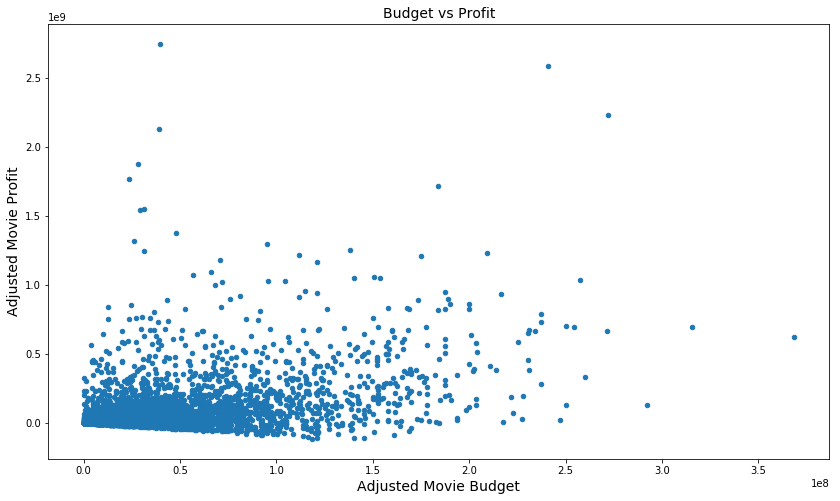

In [22]:
#plotting the scatter plot for the budget_adj and profit_adj columns: 
plot_budget = df_filtered.plot(kind='scatter', x='budget_adj', y='profit_adj', figsize=(14,8))
plot_budget.set_xlabel('Adjusted Movie Budget', fontsize=14)
plot_budget.set_ylabel('Adjusted Movie Profit', fontsize=14)
plot_budget.set_title('Budget vs Profit', fontsize=14);

In [23]:
budget_corr = df_filtered['budget_adj'].corr(df_filtered['profit_adj'])

In [24]:
print("There is a positive correlation of {} between Budget and profitablity of a movie".format(budget_corr))

There is a positive correlation of 0.42025811791988776 between Budget and profitablity of a movie


As we can see in the scatterplot above,The higher the budget a of movie the higer the profitablity. It shows that the production companies' initial investment has a payback. 

### FUN: The most profitable movie:
As a side question, I am intreseted to see what's the most profitable movie of all time, so I will use pandas's .idxmax() to look for the hightes profitable movie. 

In [25]:
#filtering the data for the maximum profit column. 
pd.DataFrame(df.loc[df['profit_adj'].idxmax()])

,1329
popularity,12.0379
budget,1.1e+07
revenue,7.75398e+08
profit,7.64398e+08
profit_percent,69.4907
original_title,Star Wars
director,George Lucas
runtime,121
genres,Adventure|Action|Science Fiction
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation


Interesting Fact: The most profitable movie is Star Wars which was released in 1977 and had and estimated 2,750,140,000

<a id='q2'></a>
### Research Question 2:  What movie genres are the most profitable? 
In order to answer this question, I will first use the groupby function to group by the genres column and then get the mean of the profit_adj column and then draw a bar chart of it. 
<ul>
    <li><a href="#intro"> Back to Introduction </a></li>
</ul>

In [26]:
#grouping the dataset by genres and getting the average for teh top 10 genres.
df_filtered.groupby('genres')['profit_adj'].mean().sort_values(ascending = False).head(10)

genres
Horror|Thriller|Adventure                    1.878643e+09
Science Fiction|Adventure|Family|Fantasy     1.767968e+09
Action|Adventure|Science Fiction|Fantasy     1.718723e+09
Crime|Drama|Mystery|Thriller|Action          1.551568e+09
Family|Animation|Drama                       1.093392e+09
Adventure|Fantasy|Family|Mystery             8.289386e+08
Family|Fantasy|Adventure                     8.254671e+08
Adventure|Action|Science Fiction             8.244358e+08
Animation|Family|Comedy|Adventure|Fantasy    7.397936e+08
Adventure|Comedy|Science Fiction|Family      7.340566e+08
Name: profit_adj, dtype: float64

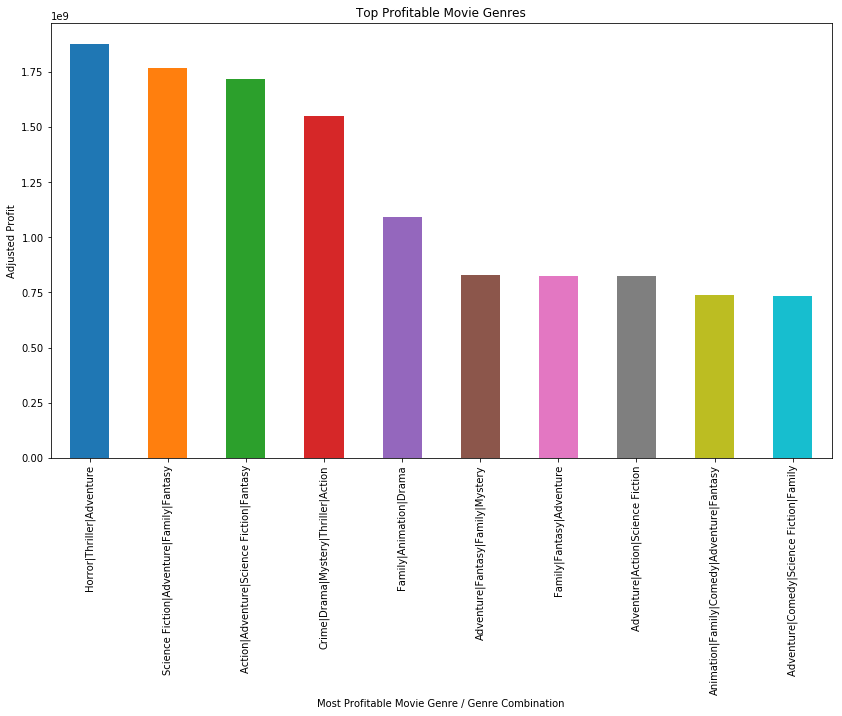

In [27]:
#Displaying the above finding in a bar chart. 
plot_genre = df_filtered.groupby('genres')['profit_adj'].mean().sort_values(ascending = False).head(10).plot(kind='bar', figsize=(14,8), title='Top Profitable Movie Genres')
plot_genre.set_xlabel('Most Profitable Movie Genre / Genre Combination')
plot_genre.set_ylabel('Adjusted Profit'); 

As we see from teh above bar chart, the most profitable movie genre is Horror|Thriller|Adventure followed by Science Fiction|Adventure|Family|Fantasy. However, if we notice below, the most frequent movie genre is Drama followed by Comedy. 

### FUN: The most frequent movie genre:
Here I want to see what is the most frequent movie genre in the dataset. 

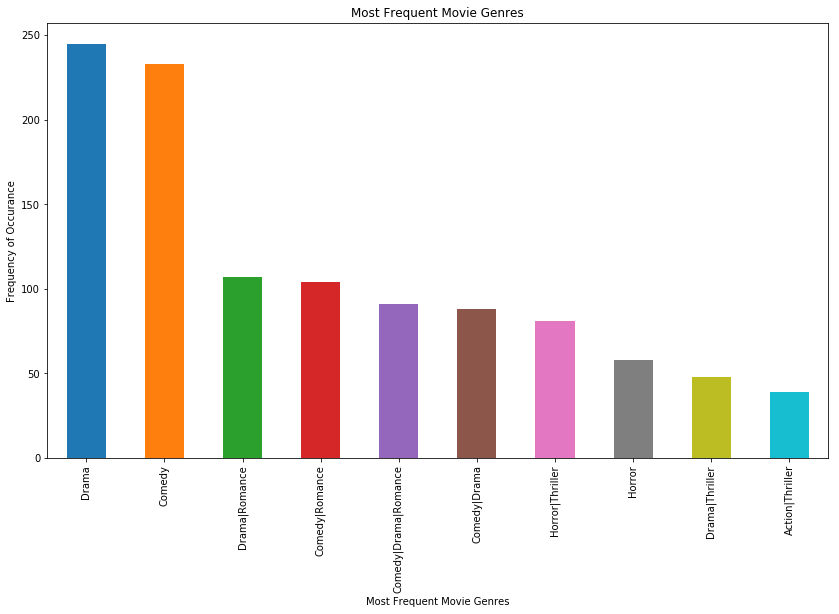

In [28]:
#plotting the most frequent movie genre. 
plot_genre1 = df_filtered['genres'].value_counts().head(10).plot(kind='bar', figsize=(14,8), title='Most Frequent Movie Genres')
plot_genre1.set_xlabel('Most Frequent Movie Genres')
plot_genre1.set_ylabel('Frequency of Occurance'); 

In [29]:
highest_count = df_filtered['genres'].value_counts().head(1)
print("The most frequent genre in the data was {}".format(highest_count));

The most frequent genre in the data was Drama    245
Name: genres, dtype: int64


<a id='q3'></a>
### Research Question 3: Does the release month affect the movie's profitablity?
In order to answer this question, I will use the groupby function to group the dataset by the release month and then take the average profit per month. I am trying to see if the release month affects the profits of a movie. 

<ul>
    <li><a href="#intro"> Back to Introduction </a></li>
</ul>

In [35]:

df_filtered['release_month'].describe()

count    3850.000000
mean        7.041558
std         3.363234
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: release_month, dtype: float64

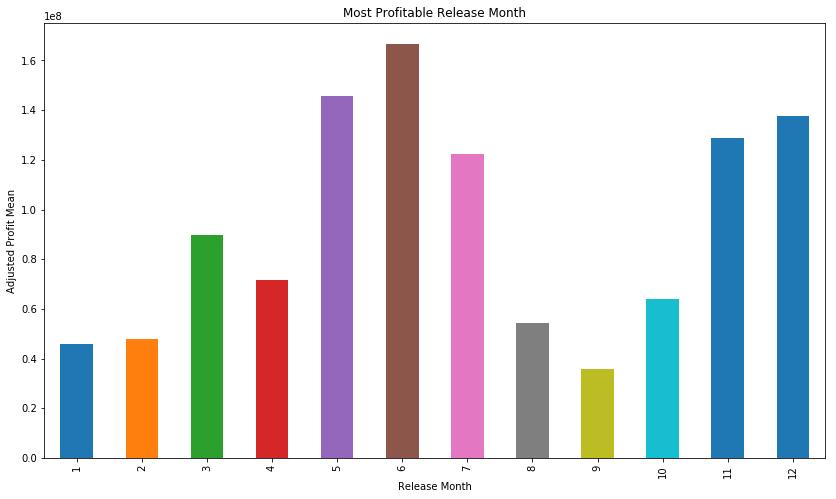

In [36]:
#plotting the most popular release month and see if there is a difference between certian release months. 
plot_month = df_filtered.groupby('release_month')['profit_adj'].mean().plot(kind='bar', figsize=(14,8), title = "Most Profitable Release Month")
plot_month.set_xlabel('Release Month')
plot_month.set_ylabel("Adjusted Profit Mean");

We see from the bar chart above that the most profitable release month is June and the lease profitable month is September. 

In [37]:
#getting the name of the most profitable month. 
month_most_profit= df_filtered.groupby('release_month')['profit_adj'].mean().sort_values(ascending = False).head(1)

In [38]:
#getting the name of the lease profitable month. 
month_least_profit = df_filtered.groupby('release_month')['profit_adj'].mean().sort_values(ascending = False).tail(1)

In [40]:
print("As we see in the chart above, the most profitable month is {}, and the lease profitable month is {}".format(month_most_profit, month_least_profit))

As we see in the chart above, the most profitable month is release_month
6    1.666797e+08
Name: profit_adj, dtype: float64, and the lease profitable month is release_month
9    3.587439e+07
Name: profit_adj, dtype: float64


<a id='q4'></a>
### Research Question 4: Is there a coreclation  between the popular movies and their profitability? 
I want to see if popular movies are also more profitable. 

<ul>
    <li><a href="#intro"> Back to Introduction </a></li>
</ul>

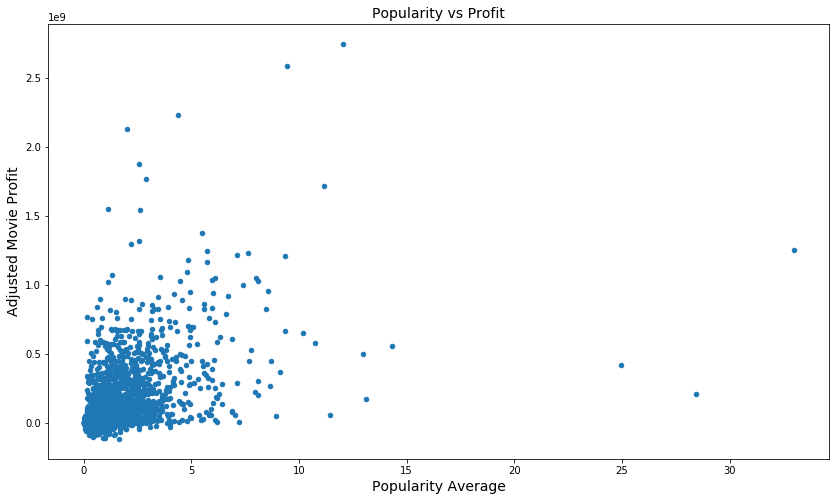

In [41]:
#Plotting the popularity and profitablity of a movie in a the following scatterplot. 
plot_popularity = df_filtered.plot(kind='scatter', x='popularity', y='profit_adj', figsize=(14,8))
#modifying the x label. 
plot_popularity.set_xlabel('Popularity Average', fontsize=14)
#modifying the y label. 
plot_popularity.set_ylabel('Adjusted Movie Profit', fontsize=14)
#modifying the title of the plot. 
plot_popularity.set_title('Popularity vs Profit', fontsize=14);

In [42]:
#Calculating the correlation of the the popularity and profit_adj columns. 
popularity_corr = df_filtered['popularity'].corr(df_filtered['profit_adj'])

In [43]:
print("There is a positive correlation of {} between popularity and profitablity of a movie".format(popularity_corr))

There is a positive correlation of 0.5171684111206264 between popularity and profitablity of a movie


As we see in the above scatterplot, the more profitable movies are also the more popular ones.

<a id='s1'></a>
### Secondary Question 1: How does the total profit of the movies has changed over the years? 

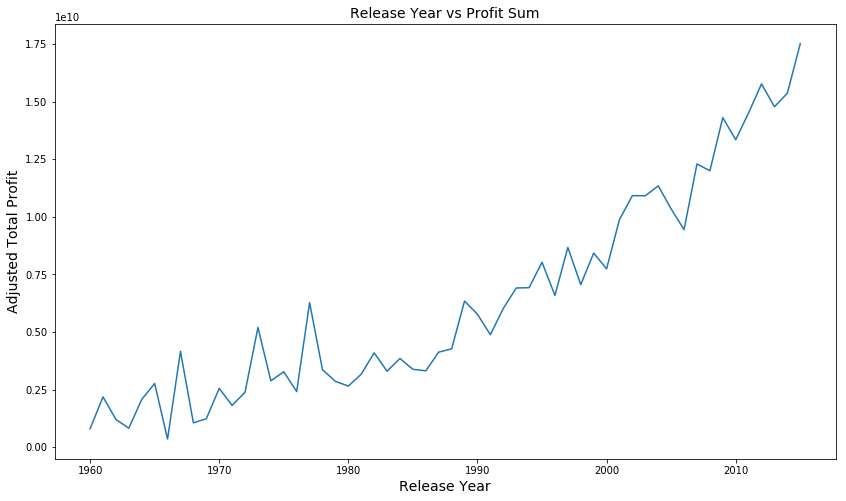

In [44]:
#plotting the profit sum of the movies over years. 
plot_year = df.groupby('release_year')['profit_adj'].sum().plot(figsize=(14,8))
#modifying the x label. 
plot_year.set_xlabel('Release Year', fontsize=14)
#modifying the y label. 
plot_year.set_ylabel('Adjusted Total Profit', fontsize=14)
#modifying the title of the plot. 
plot_year.set_title('Release Year vs Profit Sum', fontsize=14);

The above plot shows that movies are earning more profits as the years goes. 

<a id='s2'></a>
### Secondary Question 2: What genres are more popular?

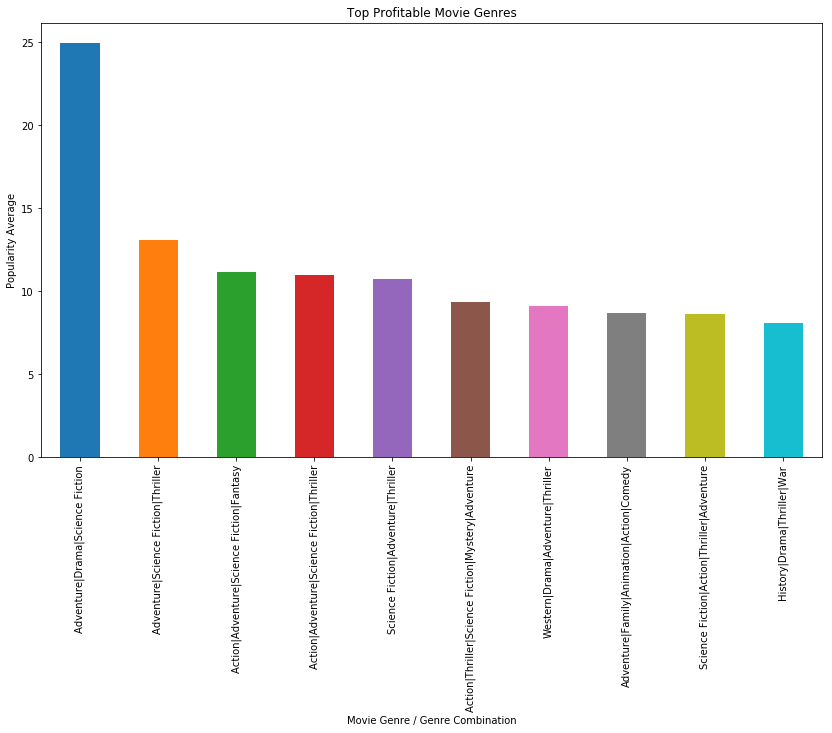

In [46]:
#plotting the most popular movie genre: 
plot_genre2 = df_filtered.groupby('genres')['popularity'].mean().sort_values(ascending = False).head(10).plot(kind='bar', figsize=(14,8), title='Top Profitable Movie Genres')
#modifying the x label. 
plot_genre2.set_xlabel('Movie Genre / Genre Combination')
#modifying the y label. 
plot_genre2.set_ylabel('Popularity Average'); 

As we can see in the above bar chart, the most popular movie genre is Adventure|Drama|Science Fiction. 

<a id='conclusions'></a>
## Conclusions


> After a through investigation of the dataset, we can conclude the following results: 

> 1. The higher the budget of a movie, the higher the profits.
> 2. The most profitable movie genre is Horror|Thriller|Adventure with an average profit of 1.878643e+09
> 3. The most profitable release month for a movie is June and the least profitable month is September. 
> 4. The most popular movies are also the most profitable. 

##### Limitations: 
> - Almost half of the dataset had zeros for the budget and revenue columns. I am sure that the results would be more accurate if we had more complete dataset.. For the future studies, It will be interesting to include more rows and run these questions again to see if they still hold true. 

<ul>
    <li><a href="#intro"> Back to Introduction </a></li>
</ul>